In [2]:
# Title:  Challenge: Association Analysis with Apriori

# INSTALL AND LOAD PACKAGES ################################

# Install pacman if you don't have it (uncomment next line)
# install.packages("pacman")

# Install and/or load packages with pacman
pacman::p_load(  # Use p_load function from pacman
  arules,        # Association rules mining
  arulesViz,     # Visualize association rules
  magrittr,      # Pipes
  pacman,        # Load/unload packages
  rio,           # Import/export data
  tidyverse      # So many reasons
    )

In [3]:
# SET RANDOM SEED ##########################################

# Set random seed for reproducibility in processes like
# sampling and splitting the data
set.seed(1)  # You can use any number here

In [4]:
# LOAD DATA ################################################

## Read transactional data from arules package
?Epub

Epub {arules},R Documentation


In [5]:
data("Epub")   # Load data
str(Epub)      # Structure of data

Formal class 'transactions' [package "arules"] with 3 slots
  ..@ data       :Formal class 'ngCMatrix' [package "Matrix"] with 5 slots
  .. .. ..@ i       : int [1:25893] 7 199 31 0 64 935 422 0 194 0 ...
  .. .. ..@ p       : int [1:15730] 0 1 2 3 6 7 8 9 11 12 ...
  .. .. ..@ Dim     : int [1:2] 936 15729
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : NULL
  .. .. .. ..$ : NULL
  .. .. ..@ factors : list()
  ..@ itemInfo   :'data.frame':	936 obs. of  1 variable:
  .. ..$ labels: chr [1:936] "doc_11d" "doc_13d" "doc_14c" "doc_14e" ...
  ..@ itemsetInfo:'data.frame':	15729 obs. of  2 variables:
  .. ..$ transactionID: chr [1:15729] "session_4795" "session_4797" "session_479a" "session_47b7" ...
  .. ..$ TimeStamp    : POSIXct[1:15729], format: "2003-01-01 20:59:00" "2003-01-02 07:46:01" ...


In [6]:
summary(Epub)  # Includes 5 most frequent items

transactions as itemMatrix in sparse format with
 15729 rows (elements/itemsets/transactions) and
 936 columns (items) and a density of 0.001758755 

most frequent items:
doc_11d doc_813 doc_4c6 doc_955 doc_698 (Other) 
    356     329     288     282     245   24393 

element (itemset/transaction) length distribution:
sizes
    1     2     3     4     5     6     7     8     9    10    11    12    13 
11615  2189   854   409   198   121    93    50    42    34    26    12    10 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
   10     6     8     6     5     8     2     2     3     2     3     4     5 
   27    28    30    34    36    38    41    43    52    58 
    1     1     1     2     1     2     1     1     1     1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.646   2.000  58.000 

includes extended item information - examples:
   labels
1 doc_11d
2 doc_13d
3 doc_14c

includes extended transaction information - exa

In [7]:
# Save data to `df`
df <- Epub

In [8]:
# RULES ####################################################

rules <- df %>%
  apriori(
    parameter = list(
      supp = 0.001,    # Minimum level of support
      conf = 0.75      # Minimum level of confidence
    )
  )

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.75    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 15 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[936 item(s), 15729 transaction(s)] done [0.02s].
sorting and recoding items ... [481 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 done [0.01s].
writing ... [3 rule(s)] done [0.00s].
creating S4 object  ... done [0.01s].


In [9]:
# Get number of rules
rules

set of 3 rules 

In [10]:
# See the rules with most support (this works best if the
# Console window is wide)
options(digits = 2)   # Reset R session when done
inspect(rules)        # See all the rules

    lhs                  rhs       support confidence coverage lift count
[1] {doc_6e8,doc_6e9} => {doc_6e7} 0.0011  0.89       0.0012   402  17   
[2] {doc_6e7,doc_6e9} => {doc_6e8} 0.0011  0.85       0.0013   418  17   
[3] {doc_6e7,doc_6e8} => {doc_6e9} 0.0011  0.81       0.0013   455  17   


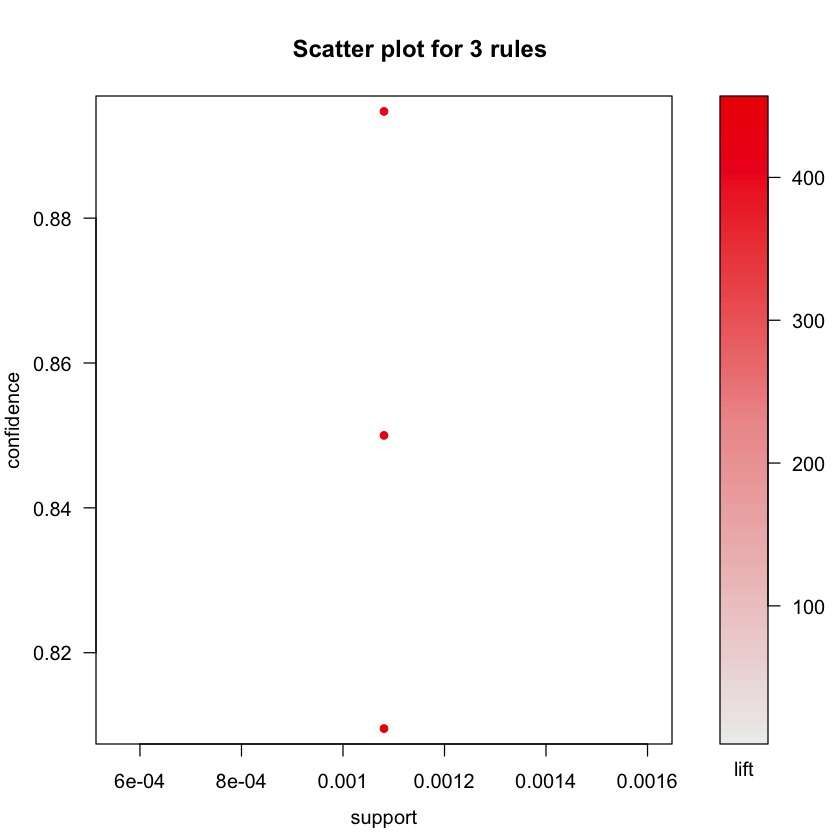

In [11]:
# PLOTS ####################################################

# Scatterplot of support x confidence (colored by lift)
plot(rules)

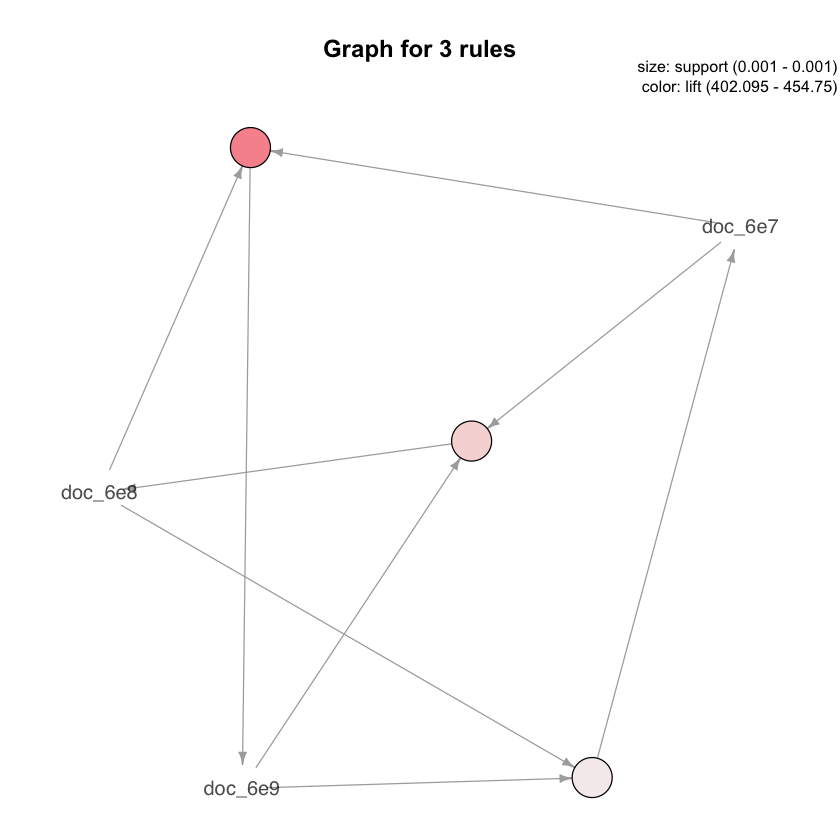

In [13]:
# Graph of top 20 rules
plot(
  rules, 
  method = "graph", 
#  control = list(type = "items")
)